# Data Visualization

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Data Generation

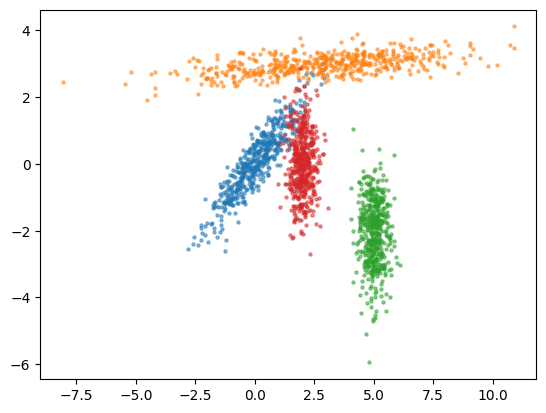

In [81]:
df = []

# multivariate normal parameters
mean1 = [0, 0]
cov1 = [
    [1, 0.9], 
    [0.9, 1]
]
# sample from multivariate normal
x = np.random.multivariate_normal(mean=mean1, cov=cov1, size=(500,))
df.append(np.concat([x, np.ones((500,1))*0], axis=1))

plt.scatter(x[:, 0], x[:, 1], s=5, alpha=0.5)

# multivariate normal parameters
mean1 = [3, 3]
cov1 = [
    [9, 0.5], 
    [0.5, 0.1]
]
# sample from multivariate normal
x = np.random.multivariate_normal(mean=mean1, cov=cov1, size=(500,))
df.append(np.concat([x, np.ones((500,1))*1], axis=1))

plt.scatter(x[:, 0], x[:, 1], s=5, alpha=0.5)

# multivariate normal parameters
mean1 = [5, -2]
cov1 = [
    [0.1, 0], 
    [0, 1]
]
# sample from multivariate normal
x = np.random.multivariate_normal(mean=mean1, cov=cov1, size=(500,))
df.append(np.concat([x, np.ones((500,1))*2], axis=1))

plt.scatter(x[:, 0], x[:, 1], s=5, alpha=0.5)

# multivariate normal parameters
mean1 = [2, 0]
cov1 = [
    [.1, 0], 
    [0, .8]
]
# sample from multivariate normal
x = np.random.multivariate_normal(mean=mean1, cov=cov1, size=(500,))
df.append(np.concat([x, np.ones((500,1))*3], axis=1))

plt.scatter(x[:, 0], x[:, 1], s=5, alpha=0.5)

In [83]:
pd.DataFrame(np.concat(df), columns=['x1', 'x2', 'y']).to_csv('../datasets/data_dc4_p1.csv', index=False)

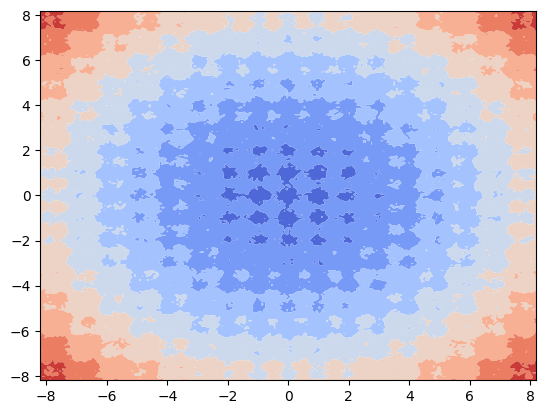

In [84]:
def f_rastrigin(xs, ys):
    return 20 + (xs**2 - 5 * np.cos(2*np.pi*xs)) + (ys**2 - 5 * np.cos(2*np.pi*ys)) + 3*np.random.randn(*xs.shape)

xx, yy = np.meshgrid(
    np.linspace(-8.2, 8.2, 200), 
    np.linspace(-8.2, 8.2, 200) 
)
D = np.vstack((xx.flatten(), yy.flatten())).T

plt.contourf(xx, yy, f_rastrigin(D[:, 0], D[:, 1]).reshape(xx.shape), cmap='coolwarm', antialiased=True)

In [85]:
df = pd.DataFrame(D, columns=['x1', 'x2'])
df['y'] = f_rastrigin(D[:, 0], D[:, 1])

df.to_csv('../datasets/data_dc4_p2.csv', index=False)

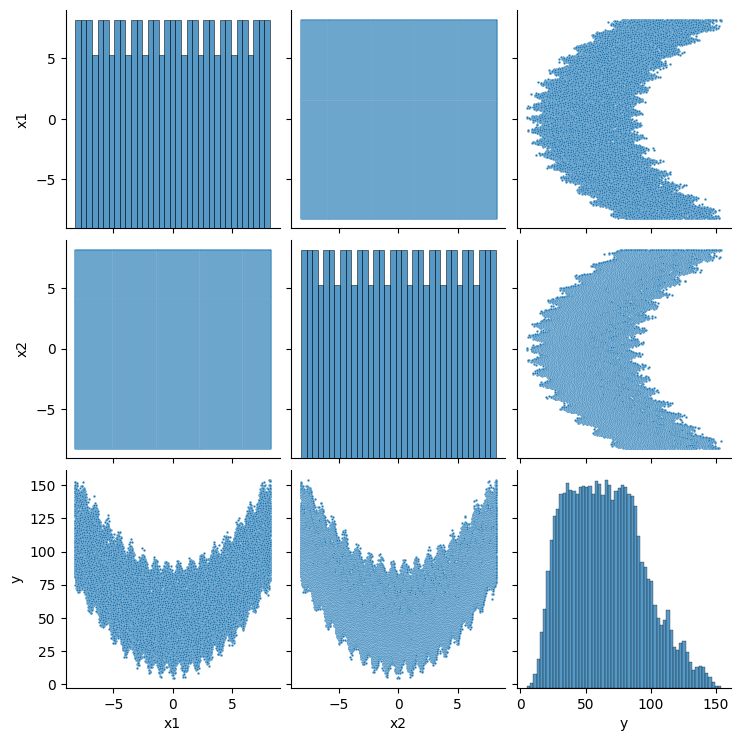

In [86]:
sns.pairplot(df, plot_kws={"s": 3})

## Exercise 1

In [90]:
df = pd.read_csv("../datasets/data_dc4_p1.csv")

df.head(10)

,x1,x2,y
0,-0.465950,0.035260,0.0
1,-0.077356,0.299851,0.0
2,-0.305498,0.380882,0.0
3,-1.708169,-1.183924,0.0
4,-2.014558,-1.771395,0.0
5,-0.010291,-0.310751,0.0
6,-0.231628,0.389419,0.0
7,1.059048,0.940708,0.0
8,-0.261618,-0.610048,0.0
9,0.202426,0.046608,0.0


<Axes: xlabel='x1', ylabel='x2'>

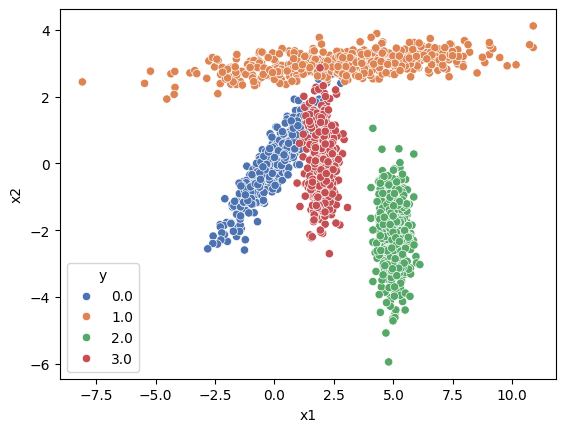

In [91]:
sns.scatterplot(data=df, x='x1', y='x2', hue='y', palette='deep')

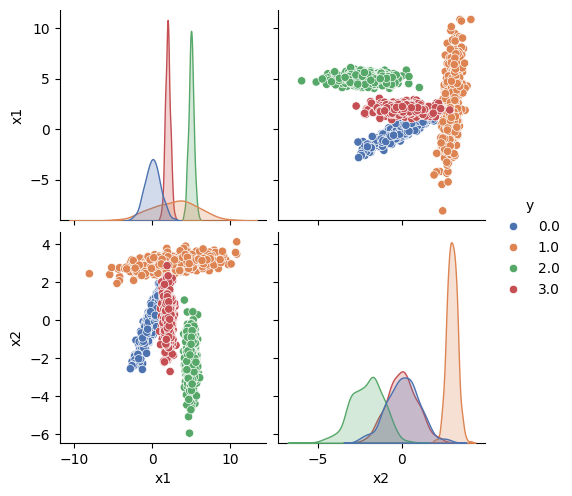

In [92]:
sns.pairplot(df, hue='y', palette='deep')

In [93]:
df[df['y'] == 3].mean()

x1    1.987540
x2    0.011864
y     3.000000
dtype: float64

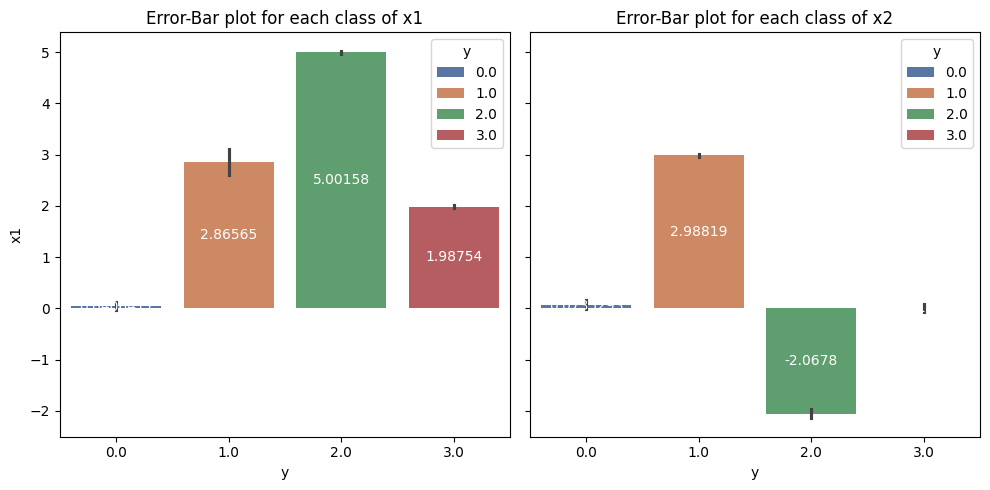

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

for i, ax in enumerate(axes):
    # barplot with 95% CI error bars and labeled with mean
    axi = sns.barplot(data=df, x='y', y=f'x{i+1}', hue='y', ax=ax, palette='deep', errorbar=('ci', 95))
    axi.bar_label(ax.containers[0], fontsize=10, color='white', label_type='center')
    axi.bar_label(ax.containers[1], fontsize=10, color='white', label_type='center')
    axi.bar_label(ax.containers[2], fontsize=10, color='white', label_type='center')
    axi.bar_label(ax.containers[3], fontsize=10, color='white', label_type='center')
    axi.set_title(f"Error-Bar plot for each class of x{i+1}")

plt.tight_layout()
plt.show()

## Exercise 2

In [96]:
df = pd.read_csv("../datasets/data_dc4_p2.csv")

df.head(10)

,x1,x2,y
0,-8.200000,-8.2,152.223889
1,-8.117588,-8.2,150.755005
2,-8.035176,-8.2,150.435007
3,-7.952764,-8.2,146.101850
4,-7.870352,-8.2,142.798264
5,-7.787940,-8.2,147.783619
6,-7.705528,-8.2,146.027140
7,-7.623116,-8.2,149.193900
8,-7.540704,-8.2,147.427243
9,-7.458291,-8.2,147.907388


In [97]:
df.shape

(40000, 3)

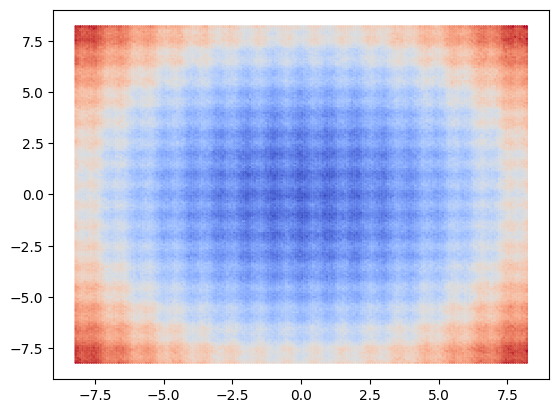

In [98]:
plt.scatter(df['x1'], df['x2'], c=df['y'], cmap='coolwarm', s=1)

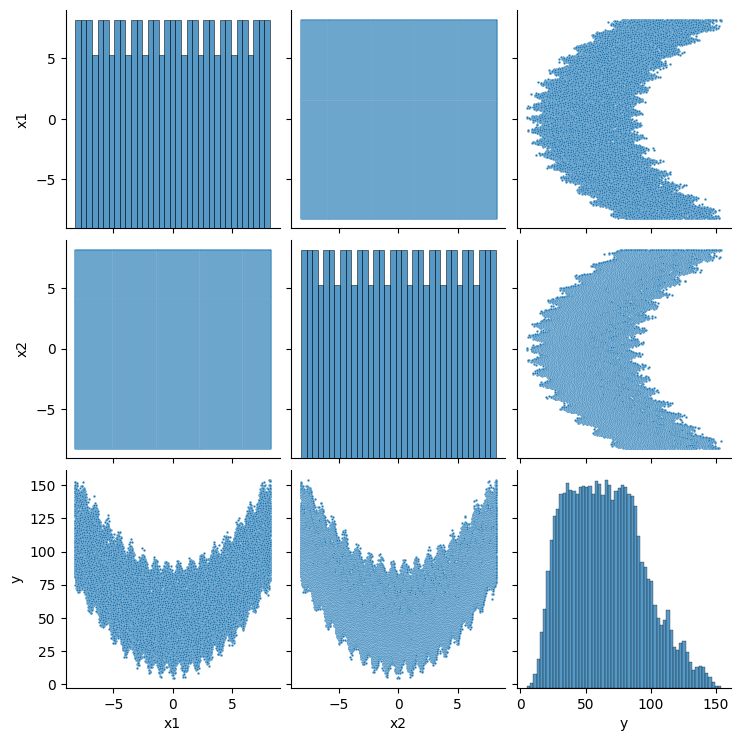

In [99]:
sns.pairplot(df, plot_kws={'s':3})

<Axes: xlabel='y', ylabel='Density'>

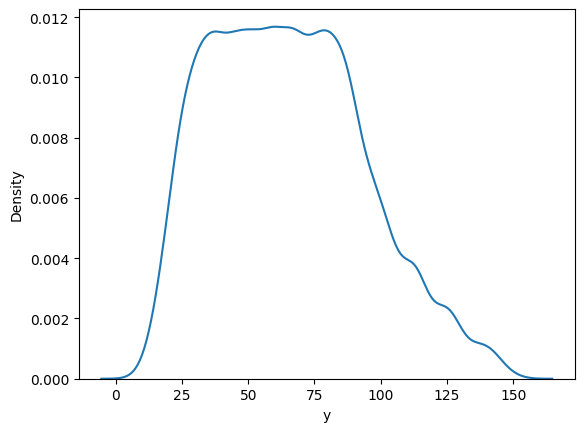

In [100]:
sns.kdeplot(df, x='y')